In [ ]:
# install yfinance
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 17.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [59]:
stocks = ["LULU",  "MNST", "AAPL", "GOOG", "AMZN", "MA", "JPM", "NVDA"]
colors = ['blue', 'green', 'red']

# download historical data
df = [yf.download(stock, period = "2y", interval = "1mo")[["Adj Close"]] for stock in stocks]
for i in range(len(stocks)):
  df[i] = df[i].rename({"Adj Close": stocks[i]}, axis=1)
df = pd.concat(df, axis=1)
print(df.head())
df = df.dropna()

# calculate daily % returns
stock_ret = df.pct_change()
stock_ret = stock_ret.dropna()
print(stock_ret.head())

for s in stocks:
  df[s + "_diff"] = (df[s].diff())
  #df[s + "_return"] = df[s]
df = df.dropna()
print(df[[s+"_diff" for s in stocks]].head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                                HZNP  POWWP  ALFIW       GNTY   PRTS  MCAFR  \
Date                                                                          
2020-11-01 00:00:00-04:00  70.430000    NaN    NaN  27.461027  15.07    NaN   
2020-12-01 00:00:00-05:00  73.150002    NaN    NaN  28.547647  12.39    NaN   
2020-12-24 00:00:00-05:00        NaN    NaN    NaN        NaN    NaN    NaN   
2021-01-01 00:00:00-05:00  72.480003    NaN    NaN  3

LULU
-51.0
MNST
36.0
AAPL
114.0
COVARIANCE of percentage returns
      LULU  MNST  AAPL
LULU  85.0  -5.0  40.0
MNST  -5.0  40.0  16.0
AAPL  40.0  16.0  63.0


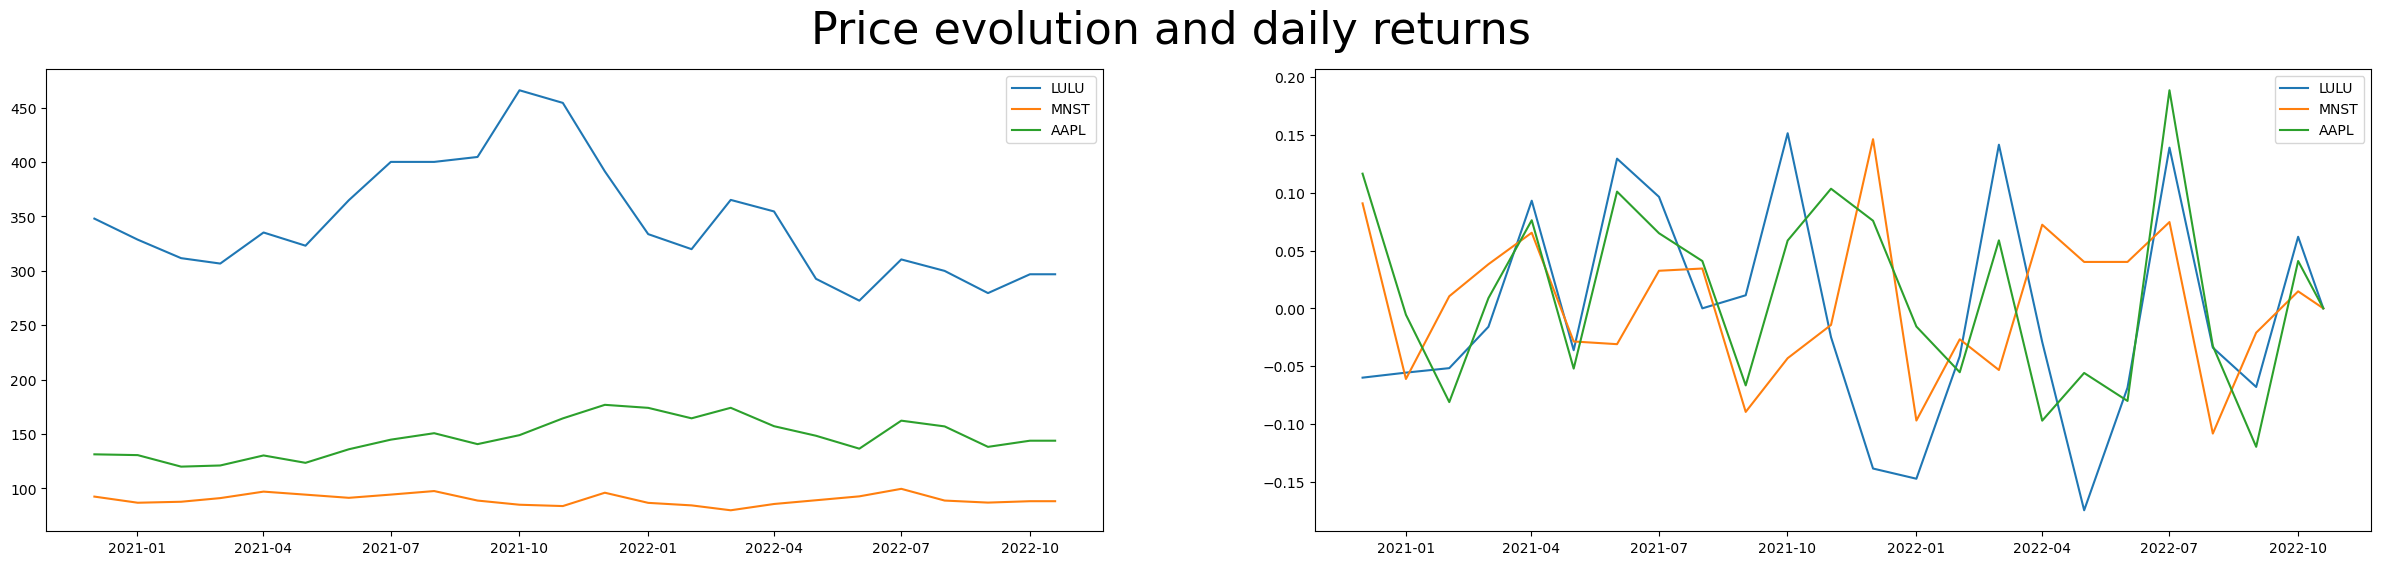

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(30,6))
fig.suptitle('Price evolution and daily returns', fontsize='32')

mult = 1e4

for s in stocks:
  ax[0].plot(df[s])
  ax[1].plot(stock_ret[s])
  print(s)
  print(np.rint(stock_ret[s].mean()*mult))
print("COVARIANCE of percentage returns")
print(np.rint(stock_ret.cov()*mult))
  

ax[0].legend(stocks)
ax[1].legend(stocks)

$$
min_z -\mu^tz + z^t\sigma z \\
s.t. z \in Z^d \\
\sum_i z_i = \frac{1}{p_w}
$$

Now we reformulate the model, using binary variables. In particular the partition is $w = 3$, $p_w = 1/(2^w-1) = 1/7$ and therefore we need 3 binary variables for every integer:

$$
min_z -\Mu^tx + x^t\Sigma x \\
s.t. x \in B^{3d} \\
\sum_i \sum_{j = 0}^2 2^j x_{ij} = 2^w - 1
$$

Binary expansion:
$$
z = \sum_{i = 0}^2 2^i x_i
$$

Where $\Mu$ and $\Sigma$ are the corresponding $\mu$ and $\sigma$ but for binary variables structures


In [71]:
### GET not NaN stocks

all_stocks = []

with open('./stocks_screener.csv', 'r') as fold:
    next(fold)
    #i = 0
    #old_best = 0
    for line in fold:
        """ i += 1
        if np.rint(4800/i *10) > old_best:
            old_best = np.rint(4800/i *10)
            print(f"{old_best}0%...\n") """
        if line[2] == ",":
            comma_pos = 2
        elif line[3] == ",":
            comma_pos = 3
        elif line[4] == ",":
            comma_pos = 4
        elif line[5] == ",":
            comma_pos = 5
        elif line[1] == ",":
            comma_pos = 1
        else:
            print("No comma found in this line")
            continue

        stock = line[:comma_pos]
        df = yf.download(stock, period = "2y", interval = "1mo", progress = False)[["Adj Close"]]
        unvalid = np.any( np.isnan(df["Adj Close"]) )
        if not unvalid:
            all_stocks.append(stock)

print(len(all_stocks))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [73]:
# get a subset of total stocks
n_stocks = 800
STOCKS = np.random.choice(all_stocks, size = n_stocks, replace=False)

['FLGC' 'TRON' 'CMPS' 'ENOB' 'UCTT' 'UPTDU' 'RDFN' 'BMBL' 'PTOCW' 'NEOV']
['WINT' 'PRAA' 'AVEO' 'VYGR' 'LMACU' 'GSRMW' 'RFACU' 'BLFY' 'XP' 'SY']


In [10]:
sp500stocks = []

with open('../../../../Downloads/splist.csv', 'r') as f:
    next(f)
    i = 1
    for line in f:
        print(i)
        i += 1
        if line[2] == ",":
            comma_pos = 2
        elif line[3] == ",":
            comma_pos = 3
        elif line[4] == ",":
            comma_pos = 4
        elif line[5] == ",":
            comma_pos = 5
        elif line[1] == ",":
            comma_pos = 1
        else:
            print("No comma found in this line")
            continue

        stock = line[:comma_pos]
        sp500stocks.append(stock)

print(len(sp500stocks))
        


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [10]:
# get valid_STOCKS from STOCKS

STOCKS = valid_STOCKS

frames = []
i = 0
for i in range(len(STOCKS)):
    print(i)
    stock = STOCKS[i]
    df = yf.download(stock, period = "2y", interval = "1mo")[["Adj Close"]]
    df = df.rename({"Adj Close": stock}, axis=1)

    times = list(df.index)
    for i, t in enumerate(times):
        if t.date().day != 1:
            df = df.drop(t)
    n_invalids = np.sum( np.isnan(df[stock]) )
    if n_invalids <= 4 and len(df[stock]) > 23:
        frames.append(df)
        
print(f"Collected {len(frames)} frames")
df_valid = pd.concat(frames, axis=1)
#df_valid
### get the names of the valid STOCKS from df_valid
valid_STOCKS = list(df_valid.columns)
print(len(valid_STOCKS))

0
[*********************100%***********************]  1 of 1 completed
1
[*********************100%***********************]  1 of 1 completed
2
[*********************100%***********************]  1 of 1 completed
3
[*********************100%***********************]  1 of 1 completed
4
[*********************100%***********************]  1 of 1 completed
5
[*********************100%***********************]  1 of 1 completed
6
[*********************100%***********************]  1 of 1 completed
7
[*********************100%***********************]  1 of 1 completed
8
[*********************100%***********************]  1 of 1 completed
9
[*********************100%***********************]  1 of 1 completed
10
[*********************100%***********************]  1 of 1 completed
11
[*********************100%***********************]  1 of 1 completed
12
[*********************100%***********************]  1 of 1 completed
13
[*********************100%***********************]  1 of 1 completed
14

# Get data from SP500 and build database

In [3]:
# fetch sp500STOCKS names

STOCKS = [
    'ABMD', 'ATVI', 'ADBE', 'AKAM', 'ALK', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AMD', 'AAL', 'ANSS', 'APTV', 'ACGL', 'ANET', 'ADSK', 'AZO', 'BIO', 'BIIB', 'BA', 'BKNG', 'BSX', 'CDNS', 'CZR', 'KMX', 'CCL', 'CTLT', 'CBOE', 'CBRE', 'CNC', 'CDAY', 'CRL', 'CHTR', 'CMG', 'COO', 'CPRT', 'CSGP', 'DVA', 'DAL', 'DXCM', 'DISH', 'DIS', 'DLTR', 'DXC', 'EW', 'ENPH', 'EPAM', 'EQT', 'ETSY', 'EXPE', 'EXPD', 'FFIV', 'FISV', 'FLT', 'FTNT', 'FOXA', 'FOX', 'IT', 'GNRC', 'GM', 'GL', 'GS', 'HSIC', 'HLT', 'HOLX', 'HST', 'IDXX', 'ILMN', 'INCY', 'ISRG', 'IQV', 'KEYS', 'LH', 'LVS', 'LYV', 'MAR', 'MTCH', 'META', 'MTD', 'MRNA', 'MHK', 'MOH', 'TAP', 'MNST', 'NFLX', 'NWSA', 'NWS', 'NCLH', 'NVR', 'ORLY', 'ON', 'PAYC', 'PYPL', 'PCG', 'PTC', 'QRVO', 'REGN', 'RCL', 'CRM', 'NOW', 'SEDG', 'LUV', 'SIVB', 'SNPS', 'TMUS', 'TTWO', 'TDY', 'TSLA', 'TDG', 'TRMB', 'TYL', 'ULTA', 'UAL', 'URI', 'VRSN', 'VRTX', 'WBD', 'WAT', 'WDC', 'WYNN', 'ZBRA'
]
print(len(STOCKS))

#df_valid.to_csv("../toys/stocks_info/Stocks_values_sp500.csv")
df_valid = pd.read_csv("../toys/stocks_info/Stocks_values_sp500.csv")
df_valid.head()

121


,Date,ABMD,ATVI,ADBE,AKAM,ALK,ALGN,GOOGL,GOOG,AMZN,...,ULTA,UAL,URI,VRSN,VRTX,WBD,WAT,WDC,WYNN,ZBRA
0,2020-12-01 00:00:00-05:00,324.200012,91.856590,500.119995,104.989998,52.000000,534.380005,87.632004,87.594002,162.846497,...,287.160004,43.250000,231.910004,216.399994,236.339996,30.090000,247.419998,55.389999,112.830002,384.329987
1,2021-01-01 00:00:00-05:00,348.250000,90.026382,458.769989,111.029999,48.830002,525.380005,91.367996,91.787003,160.309998,...,279.760010,39.990002,243.009995,194.070007,229.080002,41.419998,264.670013,56.430000,99.529999,387.829987
2,2021-02-01 00:00:00-05:00,324.549988,94.587067,459.670013,94.500000,65.019997,567.109985,101.095497,101.843002,154.646500,...,322.329987,52.680000,297.380005,194.029999,212.550003,53.029999,273.880005,68.529999,131.729996,499.429993
3,2021-03-01 00:00:00-05:00,318.730011,92.004990,475.369995,101.900002,69.209999,541.530029,103.125999,103.431503,154.703995,...,309.170013,57.540001,329.309998,198.759995,214.889999,43.459999,284.170013,66.750000,125.370003,485.179993
4,2021-04-01 00:00:00-04:00,320.730011,90.214355,508.339996,108.699997,69.139999,595.530029,117.675003,120.505997,173.371002,...,329.350006,54.400002,319.950012,218.770004,218.199997,37.660000,299.869995,70.629997,128.399994,487.739990


In [16]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import OptimizationResultStatus
from docplex.mp.model_reader import ModelReader
from qiskit_optimization.translators import from_docplex_mp
from ds import Problem
import warnings

#       !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# It is assumed that you have STOCKS and df_valid as global variables
#       !!!!!!!!!!!!!!!!!!!!!!!!!!!!!

def binary_mapper_PO(n_int, bin_per_int, mu, sigma):
    mu = mu.to_numpy()
    sigma = sigma.to_numpy()
    assert len(mu) == n_int
    n_bin = n_int * bin_per_int
    
    # constraints 
    A = np.array( [2**i for i in range(bin_per_int-1, -1, -1)]*n_int )
    b = 2**bin_per_int - 1
    
    # objective
    scaler = A
    Mu = np.array([[el for i in range(bin_per_int)] for el in mu]).flatten()
    Mu = Mu*scaler

    grid = np.outer(scaler, scaler)
    Sigma = np.ndarray((n_bin, n_bin), dtype=int)
    for i in range(n_int):
        for j in range(n_int):
            Sigma[bin_per_int*i : bin_per_int*(i+1), bin_per_int*j : bin_per_int*(j+1)] = sigma[i,j]
    Sigma = Sigma*grid

    assert len(A) == n_bin
    assert len(Mu) == n_bin
    assert np.shape(Sigma)[0] == n_int * bin_per_int

    return Mu, Sigma, A, b

def build_qp(n, mu, sigma, A, b):
    '''
    Returns a quadratic problem with n decision variable, h and l respectively quadratic and linear 
    part of objective function and A and b matrix and vector corresponding to constraints
    '''
    qp = QuadraticProgram(name='random_problem.lp')
    for i in range(n):
        qp.binary_var()
    # objective function
    qp.minimize(linear = -mu, quadratic = sigma)
    # constraints
    qp.linear_constraint(linear = A, sense = "==", rhs = b)
    return qp


def build_instance(n_int, bin_per_int, test_set, risk_aversion, multiplier, seed = 42, to_file = True):
    '''
    Given the problem size (n_vars and n_cons), create a problem instance, normalize it, check feasibility and write to file
    normalize_method identifies the way in which the instance is generated and normalized. Specifically, BN, SN and NN
    refer to BruteNormalization, SamplingNormalization and NoNormalization, respectively.
    Return:
        p - the problem instance
    '''
    
    np.random.seed(seed)
    # produce instance
    n = bin_per_int * n_int
    # get data with not many NaN from valid_STOCKS for the Tickers and from df_valid for the financial data itself
    my_stocks = np.random.choice(STOCKS, replace = False, size = n_int)

    # get and clean data for stocks
    df = df_valid[my_stocks]
    df = df.dropna()
    
    stock_ret = df.pct_change()
    stock_ret = stock_ret.dropna()
    mu = np.rint(stock_ret.mean()*multiplier).astype(int)
    sigma = np.rint(stock_ret.cov()*multiplier).astype(int)
    
    # use risk_adversion factor to weight the risk wrt the return
    sigma = (sigma*risk_aversion).astype(int)

    mu, sigma, A, b = binary_mapper_PO(n_int, bin_per_int, mu, sigma)
    qp = build_qp(n, mu, sigma, A, b)
    p = Problem(qp)

    # test feasibility of instance
    # write
    file = open("test_feasibility.lp", "w")
    file.write(p.qp.export_as_lp_string())
    file.close()
    # read and try to solve
    m = ModelReader.read("test_feasibility.lp", ignore_names=True)
    p_test = Problem(from_docplex_mp(m))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c_res = p_test.solve_exact()
    if c_res.status != OptimizationResultStatus.SUCCESS:
        print(f"Status is {c_res.status}. Infeasible problem, trying another one")
        return build_instance(n_int, bin_per_int, test_set, risk_aversion, multiplier, seed = seed + 1)
    if len(c_res.x) < n:
        print("Problem with less variables, trying another one")
        return build_instance(n_int, bin_per_int, test_set, risk_aversion, multiplier, seed = seed + 1)
    
    # write to LP file
    if to_file:
        filename = f"{test_set}/{n}/random{seed}_{n}.lp"
        p.qp.write_to_lp_file(filename)
        print(f"File {filename} wrote")
    return p



def build_database(test_set, n_instances, n_int, risk_aversion, multiplier, bin_per_int = 3, starting_seed = 42):
    '''
    Write to file n_instances instances of problems to build a database
    '''
    seed = starting_seed
    for i in range(n_instances):
        build_instance(n_int, bin_per_int, test_set, risk_aversion, multiplier, seed = seed)
        seed += 100
    return

In [18]:
test_set = "../toys/PO_sp500_part3_ra05_mult2"
n_samples = 1000
int_vars = np.arange(2,9)
risk_aversion = 0.5
multiplier = 1e2

for nvars in int_vars:
    build_database(test_set, n_samples, nvars, risk_aversion, multiplier)

File ../toys/PO_sp500_part3_ra05_mult2/6/random42_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random142_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random242_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random342_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random442_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random542_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random642_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random742_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random842_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random942_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random1042_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random1142_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random1242_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random1342_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random1442_6.lp wrote
File ../toys/PO_sp500_part3_ra05_mult2/6/random1542_6.lp wrote
Fil

In [19]:
test_set = "../toys/PO_sp500_part3_ra20_mult4"
n_samples = 1000
int_vars = np.arange(2,9)
risk_aversion = 2
multiplier = 1e4

for nvars in int_vars:
    build_database(test_set, n_samples, nvars, risk_aversion, multiplier)

File ../toys/PO_sp500_part3_ra20_mult4/6/random42_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random142_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random242_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random342_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random442_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random542_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random642_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random742_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random842_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random942_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random1042_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random1142_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random1242_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random1342_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random1442_6.lp wrote
File ../toys/PO_sp500_part3_ra20_mult4/6/random1542_6.lp wrote
Fil

In [20]:
test_set = "../toys/PO_sp500_part3_ra10_mult4"
n_samples = 1000
int_vars = np.arange(2,9)
risk_aversion = 1
multiplier = 1e4

for nvars in int_vars:
    build_database(test_set, n_samples, nvars, risk_aversion, multiplier)

File ../toys/PO_sp500_part3_ra10_mult4/6/random42_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random142_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random242_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random342_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random442_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random542_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random642_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random742_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random842_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random942_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random1042_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random1142_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random1242_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random1342_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random1442_6.lp wrote
File ../toys/PO_sp500_part3_ra10_mult4/6/random1542_6.lp wrote
Fil

In [21]:
""" # fetch mySTOCKS names

STOCKS = [
    'CMPS', 'ENOB', 'UCTT', 'RDFN', 'NEOV', 'TLSA', 'GIFI', 'LIVE', 'APRE', 'PRLD', 'OPRX', 'FRPT', 'ARVL', 'LVO', 'TMPMU', 'CRUS', 'WVE', 'ANY', 'GAME', 'SYPR', 'MSPR', 'REFR', 'RUBY', 'OMER', 'LPCN', 'LVOX', 'PFX', 'PCRX', 'ICCH', 'MBRX', 'SND', 'PGEN', 'CBAY', 'AFMD', 'WLFC', 'MYGN', 'MDXG', 'LYRA', 'AEMD', 'ERII', 'SNES', 'BLI', 'SGBX', 'BOSC', 'MINM', 'LNW', 'ADPT', 'NUVA', 'LOCO', 'ACEV', 'CAPR', 'AGMH', 'HLIT', 'CTG', 'PAYS', 'WHLRP', 'ADXN', 'JAZZ', 'OGI', 'ALLK', 'BSFC', 'TENX', 'BNGO', 'CERS', 'IMAB', 'EUCRU', 'LRMR', 'MNOV', 'WPRT', 'CDMO', 'DTIL', 'UBX', 'STKS', 'ESPR', 'WDC', 'CNDT', 'OTMO', 'QDEL', 'MTEM', 'RMBS', 'VERI', 'ACET', 'GNFT', 'KIRK', 'CHEF', 'RETA', 'MTLS', 'WDAY', 'VERY', 'EKSO', 'PPIH', 'HROW', 'CMRX', 'EXLS', 'PRPL', 'PDEX', 'PLBY', 'OTIC', 'UGRO', 'VCEL', 'YELL', 'NRIX', 'AFBI', 'LITE', 'NTLA', 'IDXX', 'KVHI', 'FUSN', 'NVEE', 'LWAY', 'PBPB', 'SEAC', 'GRCY', 'MIDD', 'RDI', 'QUMU', 'STKL', 'OM', 'TOMZ', 'CSSE', 'AGBA', 'AXDX', 'HLBZ', 'ARCE', 'CGC', 'CIH', 'AEHL', 'DOMO', 'CDXC', 'NCNO', 'CDAK', 'EZPW', 'CLPT', 'AWRE', 'BLDE', 'SWIR', 'LESL', 'TTCF', 'PLXS', 'QMCO', 'TRMB', 'ATY', 'MRUS', 'BCTX', 'GPRO', 'DSGR', 'CONXU', 'LTRPB', 'KDNY', 'ABUS', 'EH', 'BLFS', 'WLDN', 'NNBR', 'CPRT', 'BIOR', 'QUIK', 'STOK', 'UNAM', 'BSGM', 'FRSX', 'SMCI', 'VWE', 'CIDM', 'SECO', 'FTDR', 'ZIVO', 'SPWH', 'THTX', 'FNKO', 'OBSV', 'RVLP', 'FFIE', 'OMCL', 'LIQT', 'IGACU', 'SMLR', 'QNST', 'OCGN', 'RYTM', 'PLUG', 'TALK', 'CGRN', 'NVNOW', 'KROS', 'XELB', 'RSLS', 'NKLA', 'ALBO', 'KEQU', 'BPTH', 'CNTY', 'QLYS', 'ETNB', 'DSGX', 'BTB', 'WVVI', 'FLNT', 'OPT', 'XTLB', 'FRGI', 'ALIM', 'MTCH', 'KMDA', 'LBTYB', 'SPNE', 'VMD', 'EHTH', 'LBTYA', 'FCUV', 'BTRS', 'PRDO', 'SJ', 'IRBT', 'PHUN', 'SUPN', 'VJET', 'PULM', 'MKTW', 'SRTS', 'FATE', 'ATOS', 'TCOM', 'GOEV', 'DMRC', 'SIFY', 'RAPT', 'LILA', 'APM', 'CKPT', 'GMGI', 'NXTP', 'SNBR', 'URBN', 'BNFT', 'WAVD', 'CABA', 'IPGP', 'GSIT', 'SSYS', 'DENN', 'MDJH', 'CRWD', 'RMCF', 'WKHS', 'KZR', 'VRME', 'OPEN', 'BRID', 'GIGM', 'ECOR', 'INSE', 'MULN', 'XSPA', 'AMST', 'PLYA', 'SILK', 'COMM', 'ALGS', 'TVTX', 'PME', 'APTX', 'EDIT', 'CSII', 'FWP', 'SINT', 'ZBRA', 'FHTX', 'SCWX', 'TREE', 'GIII', 'EVK', 'BLSA', 'PODD', 'MEDP', 'PASG', 'MOXC', 'TLF', 'WIMI', 'IVAC', 'DKNG', 'AQB', 'CVGI', 'EQ', 'YGMZ', 'ZI', 'DCPH', 'CORT', 'BTCY', 'HA', 'PAYO', 'ABCM', 'MARA', 'KIDS', 'ANGH', 'RPTX', 'MAYS', 'GDEN', 'LI', 'DNLI', 'RGNX', 'ALRN', 'BKNG', 'TITN', 'CLOV', 'MHLD', 'HSIC', 'CNCE', 'JAKK', 'LIVN', 'QLGN', 'SDGR', 'CLXT', 'HQY', 'GMTX', 'NTNX', 'ITCI', 'CCXI', 'YI', 'OPTN', 'OFIX', 'CMLS', 'TGTX', 'ANIK', 'RBBN', 'EGLX', 'LASR', 'AEHR', 'CROX', 'ACLS', 'HFFG', 'KURA', 'CHNR', 'SSTI', 'XPEL', 'LEGH', 'FVCB', 'RVNC', 'VSTA', 'AMTX', 'THRM', 'CTRN', 'TBPH', 'AACG', 'AVPT', 'DSKE', 'CVCO', 'MLACU', 'CTMX', 'LWLG', 'EVGN', 'TCX', 'AKAM', 'IONM', 'NTGR', 'EYE', 'MLAC', 'AKUS', 'ARDS', 'DARE', 'MDWD', 'ISUN', 'DISH', 'OMQS', 'ALT', 'GLPG', 'XAIR', 'VERU', 'LOPE', 'MASI', 'SMTI', 'CAAS', 'CTHR', 'OSUR', 'FIXX', 'GSMG', 'LQDA', 'FOCS', 'PRPO', 'ORTX', 'RLAY', 'ALVR', 'ZTEK', 'RWLK', 'RIGL', 'TRVN', 'MRTX', 'GT', 'GLRE', 'TCRR', 'SMTC', 'WTER', 'PHIO', 'WINT', 'PRAA', 'AVEO', 'VYGR', 'XP', 'SY'
]
print(len(STOCKS))

# df_valid.to_csv("../toys/stocks_info/MyStocks_values.csv")
df_valid = pd.read_csv("../toys/stocks_info/Stocks_values_my.csv")
#df_valid """

399
